# Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import os
import random
np.random.seed(0)

In [14]:
directory = 'pet_images/'
cat_directory = os.path.join(directory, 'cats')
dog_directory = os.path.join(directory, 'dogs')

# Loading and Shuffling Lists of Cat and Dog Images

In [16]:
cat_pics = os.listdir(cat_directory)
random.shuffle(cat_pics)

dog_pics = os.listdir(dog_directory)
random.shuffle(dog_pics)

# Calculating Training Data Split for Cat and Dog Images

In [17]:
cat_train_data = int(0.7 * len(cat_pics))
dog_train_data = int(0.7 * len(dog_pics))

In [18]:
cat_train_pics, cat_test_pics = cat_pics[:cat_train_data], cat_pics[cat_train_data:]
dog_train_pics, dog_test_pics = dog_pics[:dog_train_data], dog_pics[dog_train_data:]

# Creating Train and Test Directories for Image Classification Data

In [19]:
train_directory = os.path.join(directory, 'train')
os.makedirs(train_directory, exist_ok=True)

test_directory = os.path.join(directory, 'test')
os.makedirs(test_directory, exist_ok=True)

In [26]:
for pic in cat_train_pics:
    src_path = os.path.join(cat_directory, pic)
    dst_path = os.path.join(train_directory, 'cat', pic)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    os.rename(src_path, dst_path)

In [27]:
for pic in dog_train_pics:
    src_path = os.path.join(dog_directory, pic)
    dst_path = os.path.join(train_directory, 'dog', pic)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    os.rename(src_path, dst_path)

In [ ]:
for file in cat_test_pics:
    src_path = os.path.join(cat_directory, file)
    dst_path = os.path.join(test_directory, 'cat', file)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    os.rename(src_path, dst_path)

In [ ]:
for file in dog_test_pics:
    src_path = os.path.join(dog_directory, file)
    dst_path = os.path.join(test_directory, 'dog', file)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    os.rename(src_path, dst_path)

# Data Flow Setup for Training and Testing

In [30]:
train_data_generate = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data_generate = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_data_generate.flow_from_directory(
    train_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_data_generate.flow_from_directory(
    test_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 487 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


# Simple CNN Model

In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the Neural Network Model 

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


plt.figure(figsize=(12, 4))

Epoch 1/10


16/16 [==============================] - 54s 3s/step - loss: 2.3204 - accuracy: 0.5216 - val_loss: 0.6892 - val_accuracy: 0.5905
Epoch 2/10
16/16 [==============================] - 34s 2s/step - loss: 0.6922 - accuracy: 0.5483 - val_loss: 0.6886 - val_accuracy: 0.5095
Epoch 3/10
16/16 [==============================] - 33s 2s/step - loss: 0.6930 - accuracy: 0.5175 - val_loss: 0.6890 - val_accuracy: 0.5619
Epoch 4/10
16/16 [==============================] - 33s 2s/step - loss: 0.6874 - accuracy: 0.5483 - val_loss: 0.6829 - val_accuracy: 0.5429
Epoch 5/10
16/16 [==============================] - 33s 2s/step - loss: 0.6812 - accuracy: 0.5688 - val_loss: 0.6933 - val_accuracy: 0.5571
Epoch 6/10
16/16 [==============================] - 33s 2s/step - loss: 0.6570 - accuracy: 0.6263 - val_loss: 0.6830 - val_accuracy: 0.5524
Epoch 7/10
16/16 [==============================] - 34s 2s/step - loss: 0.6212 - accuracy: 0.6735 - val_loss: 0.8870 - val_accuracy: 0.6190
Epoch 8/10
16/16 [

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

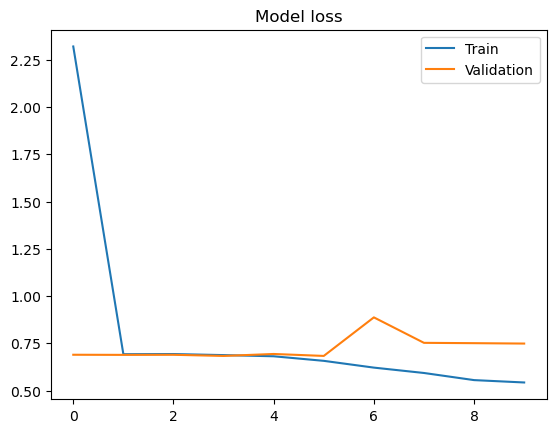

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

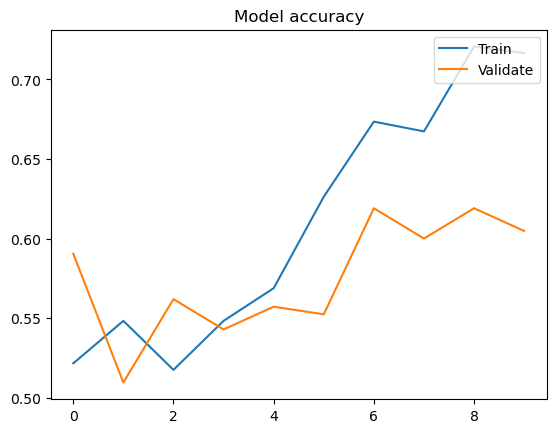

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train', 'Validate'], loc='upper right')
plt.show()

In [37]:
score = model.evaluate(test_generator, steps=len(test_generator))
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

7/7 [==============================] - 8s 1s/step - loss: 0.7484 - accuracy: 0.6048
Test Loss: 0.7484337687492371
Test Accuracy: 0.6047618985176086


# Image Prediction 

In [38]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as pltimg
def predict_new_image(img):
    img_path = img
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    img = pltimg.imread(img_path)
    plt.imshow(img)
    if prediction[0][0] > 0.5:
        plt.title("Dog")
    else:
        plt.title("Cat")
    plt.show()

1/1 [==============================] - 0s 331ms/step


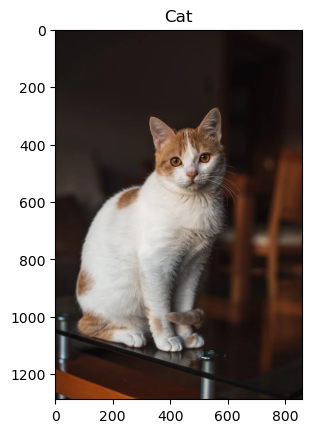

In [41]:
predict_new_image("pet_images/cat_test_img.webp")

1/1 [==============================] - 0s 87ms/step


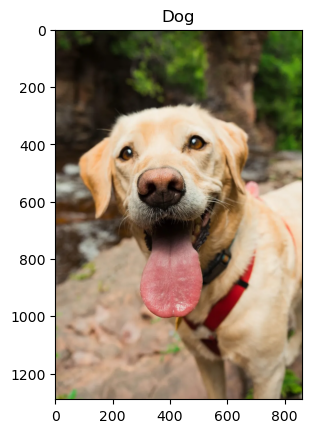

In [42]:
predict_new_image("pet_images/dog_test_img.webp")